In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly&response_type=code

Enter your authorization code:
4/1AY0e-g7Oxs5uSTKC3DoErBXFpO3ZZPGm33c8oLo1uuRafEhRuWQfiw3ZPlc


In [ ]:
from keras.models import Sequential
# To initialize neural network
from keras.layers import Convolution2D
# Images are two dimensional, concolution step
from keras.layers import MaxPooling2D
# Pooling step
from keras.layers import Flatten
# Convert pools feature map into this large feature vector
from keras.layers import Dense
#To add fully connected layers
from keras.preprocessing.image import ImageDataGenerator
# from keras.applications.resnet50 import ResNet50
from keras.applications import resnet50
from keras.models import Model
import keras

In [ ]:

IMAGE_SIZE = 64
pretrained_model = resnet50.ResNet50(input_shape=(64,64, 3), include_top=False)
pretrained_model.trainable = False

model = Sequential([
    pretrained_model,
    Flatten(),
    Dense(2, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='categorical', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2, 2, 2048)        23587712  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 16386     
Total params: 23,604,098
Trainable params: 16,386
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
#Initializing the CNN
#there is also a graph option but we'll use sequential ANN Model
restnet = resnet50.ResNet50(include_top=False, weights='imagenet',input_shape=(64,64,3))
#output = restnet.layers[-1].output
output = resnet50.output
output = keras.layers.Flatten()(output)
restnet = Model(restnet.input, output=output)
for layer in restnet.layers:
    layer.trainable = False


classifier = Sequential()

#step 1 - Convolution
#creating the feature map by using feature detector from ınput image
classifier.add(restnet)

classifier.add(Dense(output_dim = 2, activation = 'softmax'))
#binary outcome
#compiling the cnn

classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

AttributeError: ignored

In [ ]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 128)        

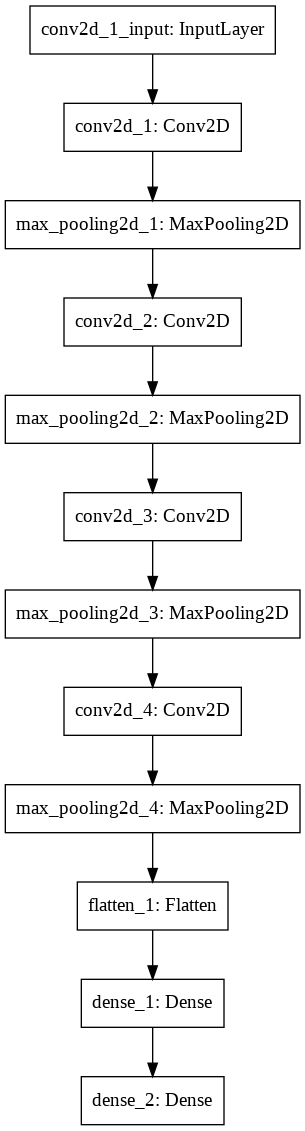

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(classifier, to_file='model_rabeya_covid.png')

In [ ]:
#Fitting to CNN to the images

from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        validation_split=0.2,
        horizontal_flip=True)


# test_datagen = ImageDataGenerator(rescale=1./255)

training_set = image_generator.flow_from_directory(
        '/content/drive/My Drive/covid dataset',
        target_size=(64, 64),
        batch_size=32,
        subset="training",
        class_mode='binary')

test_set = image_generator.flow_from_directory(
        '/content/drive/My Drive/covid dataset',
        target_size=(64, 64),
        batch_size=32,
        subset="validation",
        class_mode='binary')

results=classifier.fit_generator(
        training_set,
        samples_per_epoch=len(training_set.filenames),
        # steps_per_epoch=len(training_set.filenames)//32 ,
        nb_epoch=25,
        validation_data=test_set,
        nb_val_samples=len(test_set.filenames))

Found 1986 images belonging to 2 classes.
Found 496 images belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., steps_per_epoch=62, epochs=25, validation_steps=496)`


Epoch 1/25
16/62 [======>.......................] - ETA: 14:20 - loss: 0.7000 - accuracy: 0.5498

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 20 could not be retrieved. It could be because a worker has died.
  UserWarning)


62/62 [==============================] - 1368s 22s/step - loss: 0.6850 - accuracy: 0.5619 - val_loss: 0.6357 - val_accuracy: 0.6598
Epoch 2/25
62/62 [==============================] - 127s 2s/step - loss: 0.6277 - accuracy: 0.6602 - val_loss: 0.4545 - val_accuracy: 0.7440
Epoch 3/25
62/62 [==============================] - 127s 2s/step - loss: 0.5920 - accuracy: 0.6899 - val_loss: 0.4743 - val_accuracy: 0.7097
Epoch 4/25
62/62 [==============================] - 128s 2s/step - loss: 0.5413 - accuracy: 0.7313 - val_loss: 0.4204 - val_accuracy: 0.7671
Epoch 5/25
62/62 [==============================] - 127s 2s/step - loss: 0.5512 - accuracy: 0.7180 - val_loss: 0.5093 - val_accuracy: 0.7565
Epoch 6/25
62/62 [==============================] - 127s 2s/step - loss: 0.4837 - accuracy: 0.7717 - val_loss: 0.6303 - val_accuracy: 0.7630
Epoch 7/25
62/62 [==============================] - 127s 2s/step - loss: 0.4676 - accuracy: 0.7822 - val_loss: 0.5451 - val_accuracy: 0.7653
Epoch 8/25
62/62 [====

In [ ]:
classifier.save('rabeya_covid_80.h5')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


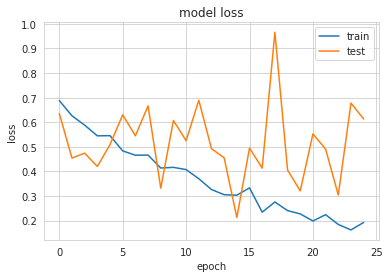

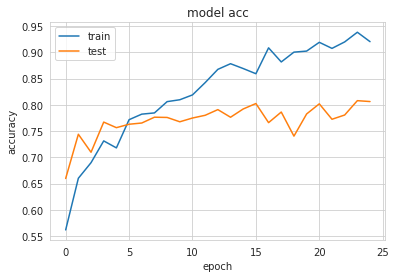

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
%matplotlib inline
history = results
sns.set_style("whitegrid")
np.random.seed(697)
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Classification Report

In [ ]:
import numpy
pred= classifier.predict(test_set)
predicted_class = [numpy.round(x) for x in pred]
true_classes = test_set.classes
labels = (test_set.class_indices)


In [ ]:
print(labels)

{'COVID': 0, 'non-COVID': 1}


In [ ]:
from sklearn.metrics import confusion_matrix
label = test_set.classes
cf = confusion_matrix(true_classes,predicted_class)
cf

array([[101, 149],
       [104, 142]])

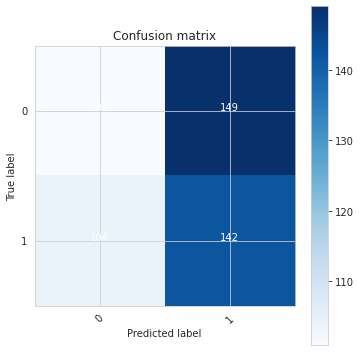

In [ ]:

# Look at confusion matrix 
import itertools
plt.rcParams['figure.figsize'] = (5, 5)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusion_matricesfor61classbangengtype.png', dpi=100)


plot_confusion_matrix(confusion_matrix(true_classes, predicted_class) ,classes = range(2))

In [ ]:
import sklearn.metrics as metrics
class_labels = list(test_set.class_indices.keys())  
report = metrics.classification_report(true_classes, predicted_class, target_names=class_labels)
print(report) 

              precision    recall  f1-score   support

       COVID       0.49      0.40      0.44       250
   non-COVID       0.49      0.58      0.53       246

    accuracy                           0.49       496
   macro avg       0.49      0.49      0.49       496
weighted avg       0.49      0.49      0.49       496

